# ライブラリ

In [15]:
import numpy as np
import torch     
import pandas as pd
import math
import pprint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm 
from matplotlib.colors import Normalize
from collections import OrderedDict

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [16]:
output_path="density_3d_arrray\\density_2410.npy"

In [17]:
config="config/config0703_nozzle"#.csv

#処理タスクリストを取得
df_config=pd.read_csv("{}.csv".format(str(config)))
df_config=df_config.set_index("experiment")
df_config=df_config[df_config["process_flag"]==1]#処理タスクリストから処理フラグ有効のみを残す

# ラプラシアンを計算

In [18]:
path="reconstructed/reconstructed.npy"
array_nabura=np.load(path)
print(array_nabura.shape)
print(array_nabura)

(557, 371, 371)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

In [19]:
def compute_laplacian(array):
    # 各座標方向における勾配の2階微分を計算
    grad_xx = np.gradient(array, axis=0)
    grad_yy = np.gradient(array, axis=1)
    grad_zz = np.gradient(array, axis=2)
    
    # ラプラシアンを計算して返す
    #laplacian = grad_xx + grad_yy + grad_zz
    laplacian =grad_yy + grad_zz

    
    return laplacian

array_laplacian=compute_laplacian(array_nabura)
print(array_laplacian.shape)
print(array_laplacian)

(557, 371, 371)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

# データローダーをつくる

In [20]:
batch_size=600 #ミニバッチのサイズを指定
array_laplacian_dataloarder=torch.utils.data.DataLoader(torch.tensor(array_laplacian).to(device),batch_size=batch_size,shuffle=False)#シャッフルは切っておく

# SOR法

In [21]:
Lx=array_laplacian.shape[0]
Ly=array_laplacian.shape[1]
Lz=array_laplacian.shape[2]
x  = Lx
y  = Ly
z  = Lz

In [22]:
e = 1e-10
# メイン
delta = 1.0
n_iter=0
u_list=[]
for batch in array_laplacian_dataloarder:  # DataLoaderからバッチを取得
    slice_laplacian = batch.to(device)  # バッチデータをデバイスに移動
    batch_size, Ly, Lz = slice_laplacian.size()
    u = torch.zeros([batch_size, Ly, Lz], device=device)  # uを同じデバイスで作成
    delta = 1.0
    n_iter = 0
    while delta > e:
        u_in = u.clone()
        n_iter += 1
        u[:, 1:-1, 1:-1] = (u_in[:, 2:, 1:-1] + u_in[:, :-2, 1:-1] +
                            u_in[:, 1:-1, 2:] + u_in[:, 1:-1, :-2] + slice_laplacian[:, 1:-1, 1:-1]) / 4

        u[:, 0, :] = 0
        u[:, Ly-1, :] = 0
        u[:, :, 0] = 0
        u[:, :, Lz-1] = 0
        delta = torch.max(torch.abs(u - u_in))
        print(f'Iteration: {n_iter}, Loss: {delta}') 
        n_iter += 1
    u_list.append(u)

u_list = torch.stack(u_list)  # 最終的な出力をリストからテンソルに変換

Iteration: 1, Loss: 1.3214488717494532e-05
Iteration: 3, Loss: 8.98887446965091e-06
Iteration: 5, Loss: 7.95027517597191e-06
Iteration: 7, Loss: 6.946618668735027e-06
Iteration: 9, Loss: 6.42251325189136e-06
Iteration: 11, Loss: 5.937803507549688e-06
Iteration: 13, Loss: 5.481495463754982e-06
Iteration: 15, Loss: 5.1749375415965915e-06
Iteration: 17, Loss: 4.905501555185765e-06
Iteration: 19, Loss: 4.677825927501544e-06
Iteration: 21, Loss: 4.469227860681713e-06
Iteration: 23, Loss: 4.289875505492091e-06
Iteration: 25, Loss: 4.122448444832116e-06
Iteration: 27, Loss: 3.973473212681711e-06
Iteration: 29, Loss: 3.832195943687111e-06
Iteration: 31, Loss: 3.7046775105409324e-06
Iteration: 33, Loss: 3.583751094993204e-06
Iteration: 35, Loss: 3.473360266070813e-06
Iteration: 37, Loss: 3.368681063875556e-06
Iteration: 39, Loss: 3.2729949452914298e-06
Iteration: 41, Loss: 3.185377863701433e-06
Iteration: 43, Loss: 3.1067756935954094e-06
Iteration: 45, Loss: 3.0297014745883644e-06
Iteration: 47

# 密度の計算

In [29]:
u_array=np.array(u_list[0].cpu())
print(u_array.shape)
print(u_array)

(557, 371, 371)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

In [30]:
exp=df_config.index[0]
temperature=df_config["temperature(℃)"][exp]
pressure=df_config["pressure(hPa)"][exp]
humidity=df_config["humidity(%)"][exp] #湿度
density_inf=df_config["density_inf"][exp]

n_inf=1.0003
G=(n_inf-1)/density_inf#Gladstone-Dale Relation
print(G)

0.0002546689303904643


In [31]:
d_density=-u_array/G
density=d_density+density_inf
print(density)
np.save(output_path,density)

[[[1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  ...
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]]

 [[1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  ...
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]]

 [[1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  ...
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]]

 ...

 [[1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  [1.178 1.178 1.178 ... 1.178 1.178 1.178]
  ...
  [1.178 1.178 1.178 ... 1.178 1.178 1.1

(371, 557)
ヒートマップの保存


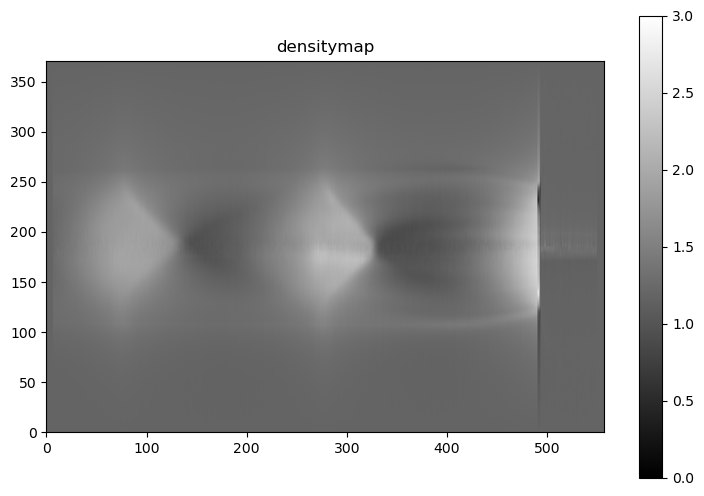

ヒートマップの表示


In [32]:
middle_index=int((density.shape[1])/2)
density_s=density[:,middle_index,:]
density_s_wide=np.rot90(density_s,1)
print(density_s_wide.shape)

def plot_showandsave(array,path,name):
    # ヒートマップを作成
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6)) # 図の設定
        #c = ax.pcolor(array, cmap='binary_r') # ヒートマップ
        c = ax.pcolor(array, cmap='binary_r',norm=Normalize(vmin=0, vmax=3)) # ヒートマップ


        ax.set_title(name) # タイトル
        ax.set_aspect('equal', adjustable='box') # アスペクト比
        fig.colorbar(c, ax=ax) # カラーバー
        plt.savefig("{}\{}".format(path,name))#画像の保存
        print("ヒートマップの保存")
        plt.show() # 図を表示
        print("ヒートマップの表示")

plot_showandsave(density_s_wide,"density","densitymap")

In [27]:
density_s

array([[1.178, 1.178, 1.178, ..., 1.178, 1.178, 1.178],
       [1.178, 1.178, 1.178, ..., 1.178, 1.178, 1.178],
       [1.178, 1.178, 1.178, ..., 1.178, 1.178, 1.178],
       ...,
       [1.178, 1.178, 1.178, ..., 1.178, 1.178, 1.178],
       [1.178, 1.178, 1.178, ..., 1.178, 1.178, 1.178],
       [1.178, 1.178, 1.178, ..., 1.178, 1.178, 1.178]], dtype=float32)

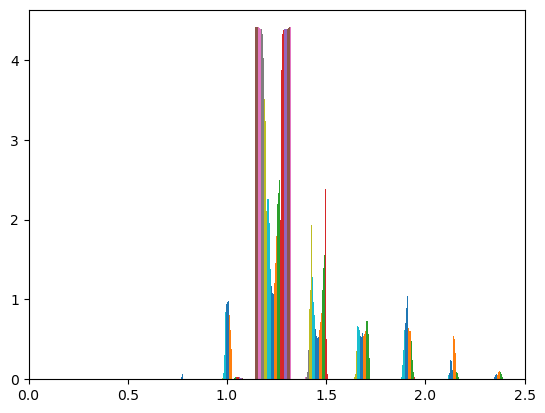

In [28]:
plt.hist(density_s,density=True)
plt.xlim(0,2.5)
plt.show()